# Timeseries

# sydney

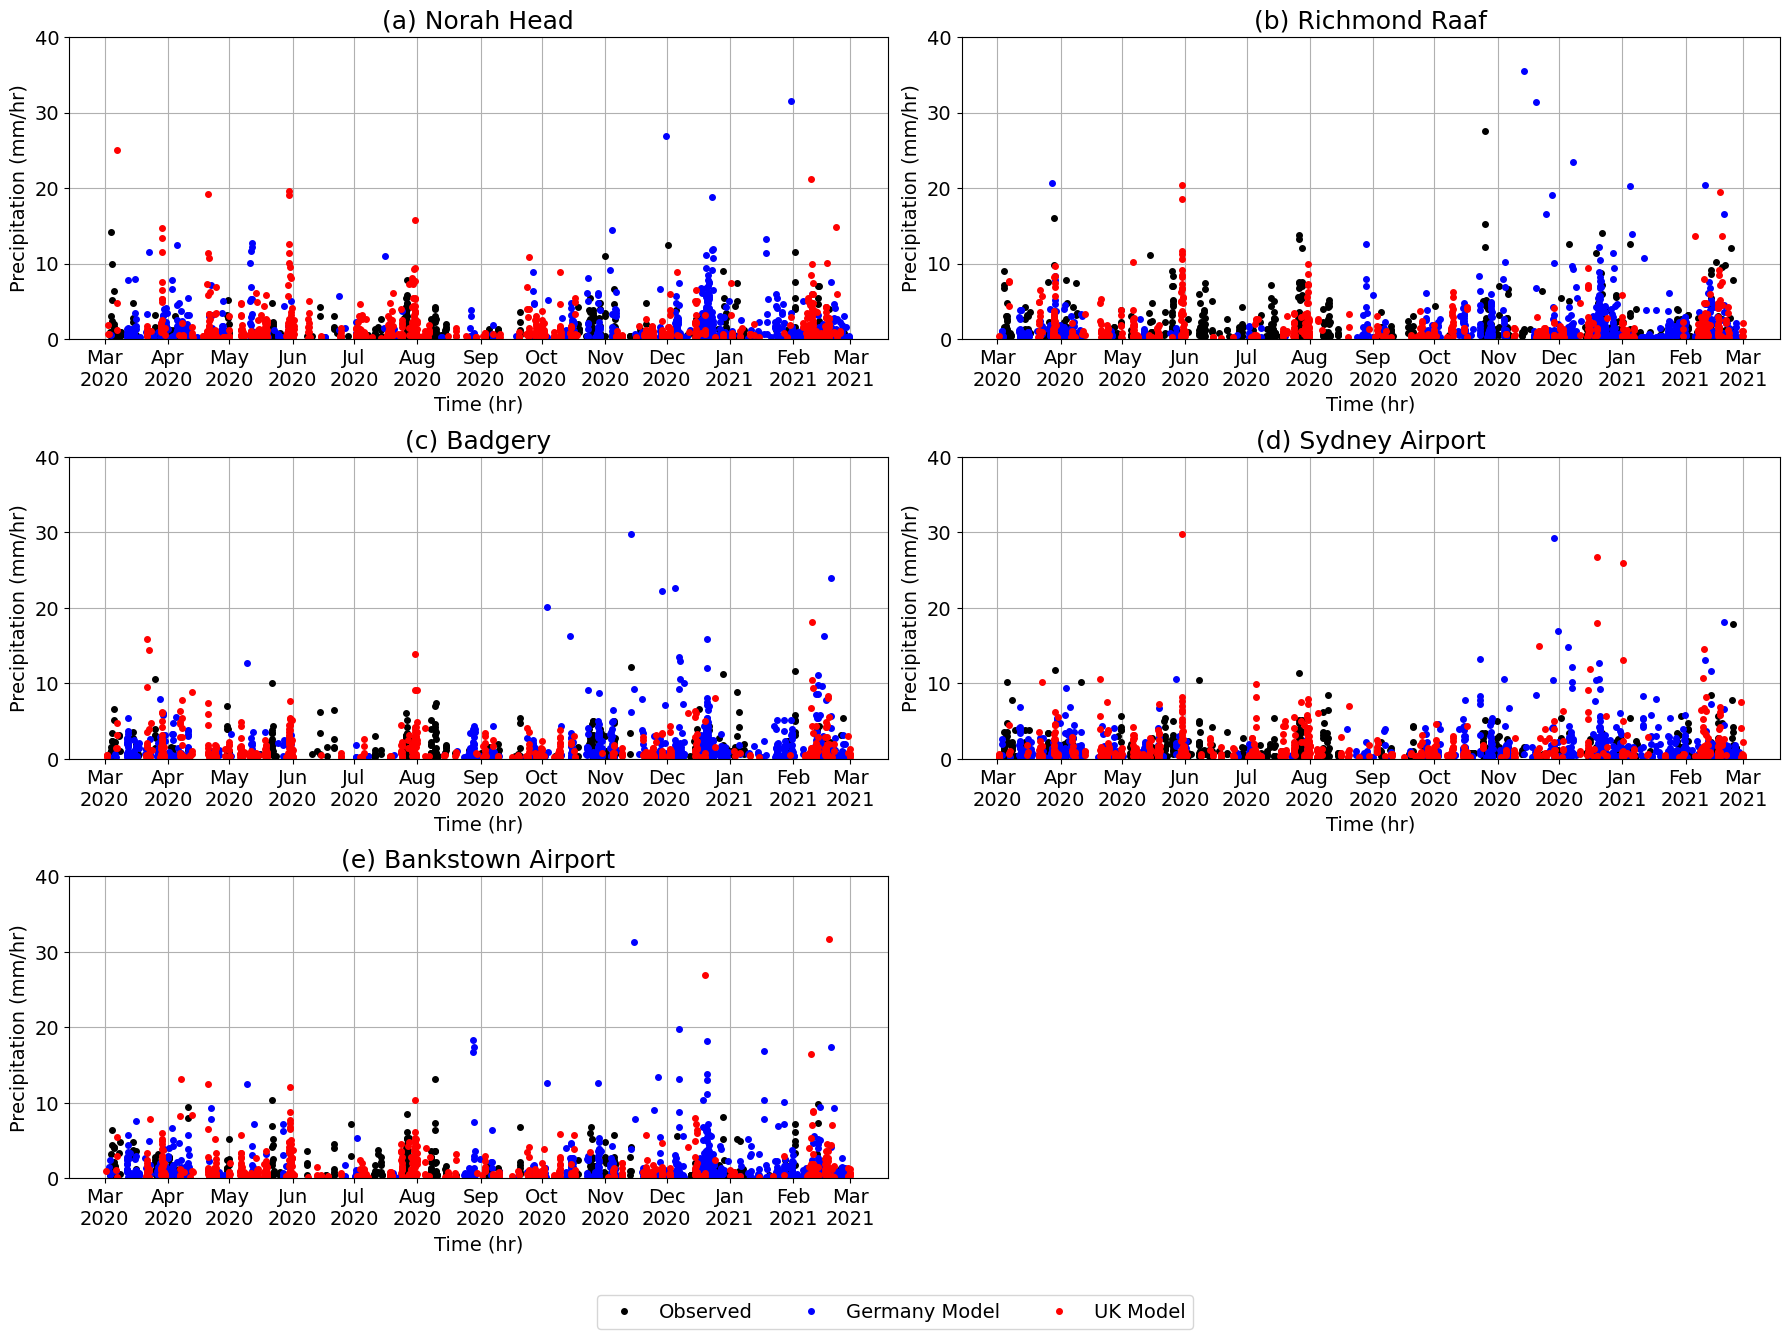

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# File paths
obs_file_paths = {
    'norah_head': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Sydney/norah_1h.csv',
    'richmond_raaf': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Sydney/richmond_1h.csv',
    'badgery': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Sydney/badgery_1h.csv',
    'sydney_airport': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Sydney/sydney_1h.csv',
    'bankstown_airport': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Sydney/bankstown_1h.csv'
}

germany_model_file_paths = {
    'norah_head': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_sydney_z10/germany_node_Norah_Head_AWS_z10.csv',
    'richmond_raaf': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_sydney_z10/germany_node_Richmond_RAAF_z10.csv',
    'badgery': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_sydney_z10/germany_node_Badgerys_Creek_AWS_z10.csv',
    'sydney_airport': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_sydney_z10/germany_node_Sydney_Airport_AMO_z10.csv',
    'bankstown_airport': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_sydney_z10/germany_node_Bankstown_Airport_AWS_z10.csv'
}

uk_model_file_paths = {
    'norah_head': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_sydney_z10/uk_node_Norah_Head_AWS_z10.csv',
    'richmond_raaf': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_sydney_z10/uk_node_Richmond_RAAF_z10.csv',
    'badgery': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_sydney_z10/uk_node_Badgerys_Creek_AWS_z10.csv',
    'sydney_airport': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_sydney_z10/uk_node_Sydney_Airport_AMO_z10.csv',
    'bankstown_airport': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_sydney_z10/uk_node_Bankstown_Airport_AWS_z10.csv'
}

# Column names and date range
obs_column = 'Precipitation'
model_column = 'value'
start_date = '2020-03-01'
end_date = '2021-02-28'
stations = list(obs_file_paths.keys())

# Initialize subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 14), sharex=True)
axes = axes.flatten()

# Plot data
for i, station in enumerate(stations):
    # Load data
    obs_df = pd.read_csv(obs_file_paths[station], index_col=0, parse_dates=True)
    germany_df = pd.read_csv(germany_model_file_paths[station], index_col=0, parse_dates=True)
    uk_df = pd.read_csv(uk_model_file_paths[station], index_col=0, parse_dates=True)

    # Shift model times by +12 hours
    germany_df.index = germany_df.index + pd.Timedelta(hours=10)
    uk_df.index = uk_df.index + pd.Timedelta(hours=10)

    # Filter by date
    obs_df = obs_df[start_date:end_date]
    germany_df = germany_df[start_date:end_date]
    uk_df = uk_df[start_date:end_date]

    # Apply precipitation threshold
    obs_df = obs_df[obs_df[obs_column] > 0.2]
    germany_df = germany_df[germany_df[model_column] > 0.2]
    uk_df = uk_df[uk_df[model_column] > 0.2]

    ax = axes[i]

    # Plot with markers only
    if i == 0:
        ax.plot(obs_df.index, obs_df[obs_column], linestyle='none', marker='o', color='black', label='Observed', markersize=4)
        ax.plot(germany_df.index, germany_df[model_column], linestyle='none', marker='o', color='blue', label='Germany Model', markersize=4)
        ax.plot(uk_df.index, uk_df[model_column], linestyle='none', marker='o', color='red', label='UK Model', markersize=4)
    else:
        ax.plot(obs_df.index, obs_df[obs_column], linestyle='none', marker='o', color='black', markersize=4)
        ax.plot(germany_df.index, germany_df[model_column], linestyle='none', marker='o', color='blue', markersize=4)
        ax.plot(uk_df.index, uk_df[model_column], linestyle='none', marker='o', color='red', markersize=4)

    subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)']
    ax.set_title(f"{subplot_labels[i]} {station.replace('_', ' ').title()}", fontsize=18)
    ax.set_ylabel('Precipitation (mm/hr)', fontsize=14)
    ax.set_xlabel('Time (hr)', fontsize=14)
    ax.grid(True)
    ax.set_ylim(0, 40)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    ax.tick_params(axis='both', which='major', labelsize=14)  # Increase number as needed

# Remove unused subplot if fewer than 6
if len(stations) < len(axes):
    fig.delaxes(axes[-1])
    
for ax in axes:
    ax.tick_params(labelbottom=True)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=14)  # Increase fontsize as needed

# Final layout
# fig.suptitle('Hourly Precipitation', fontsize=16)
fig.tight_layout(rect=[0, 0.05, 1, 0.96])

# plt.savefig("/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Plots/s6_timeseries_1hr_sydney.png", format='png', dpi=300, bbox_inches='tight')

plt.show()


# Fiji

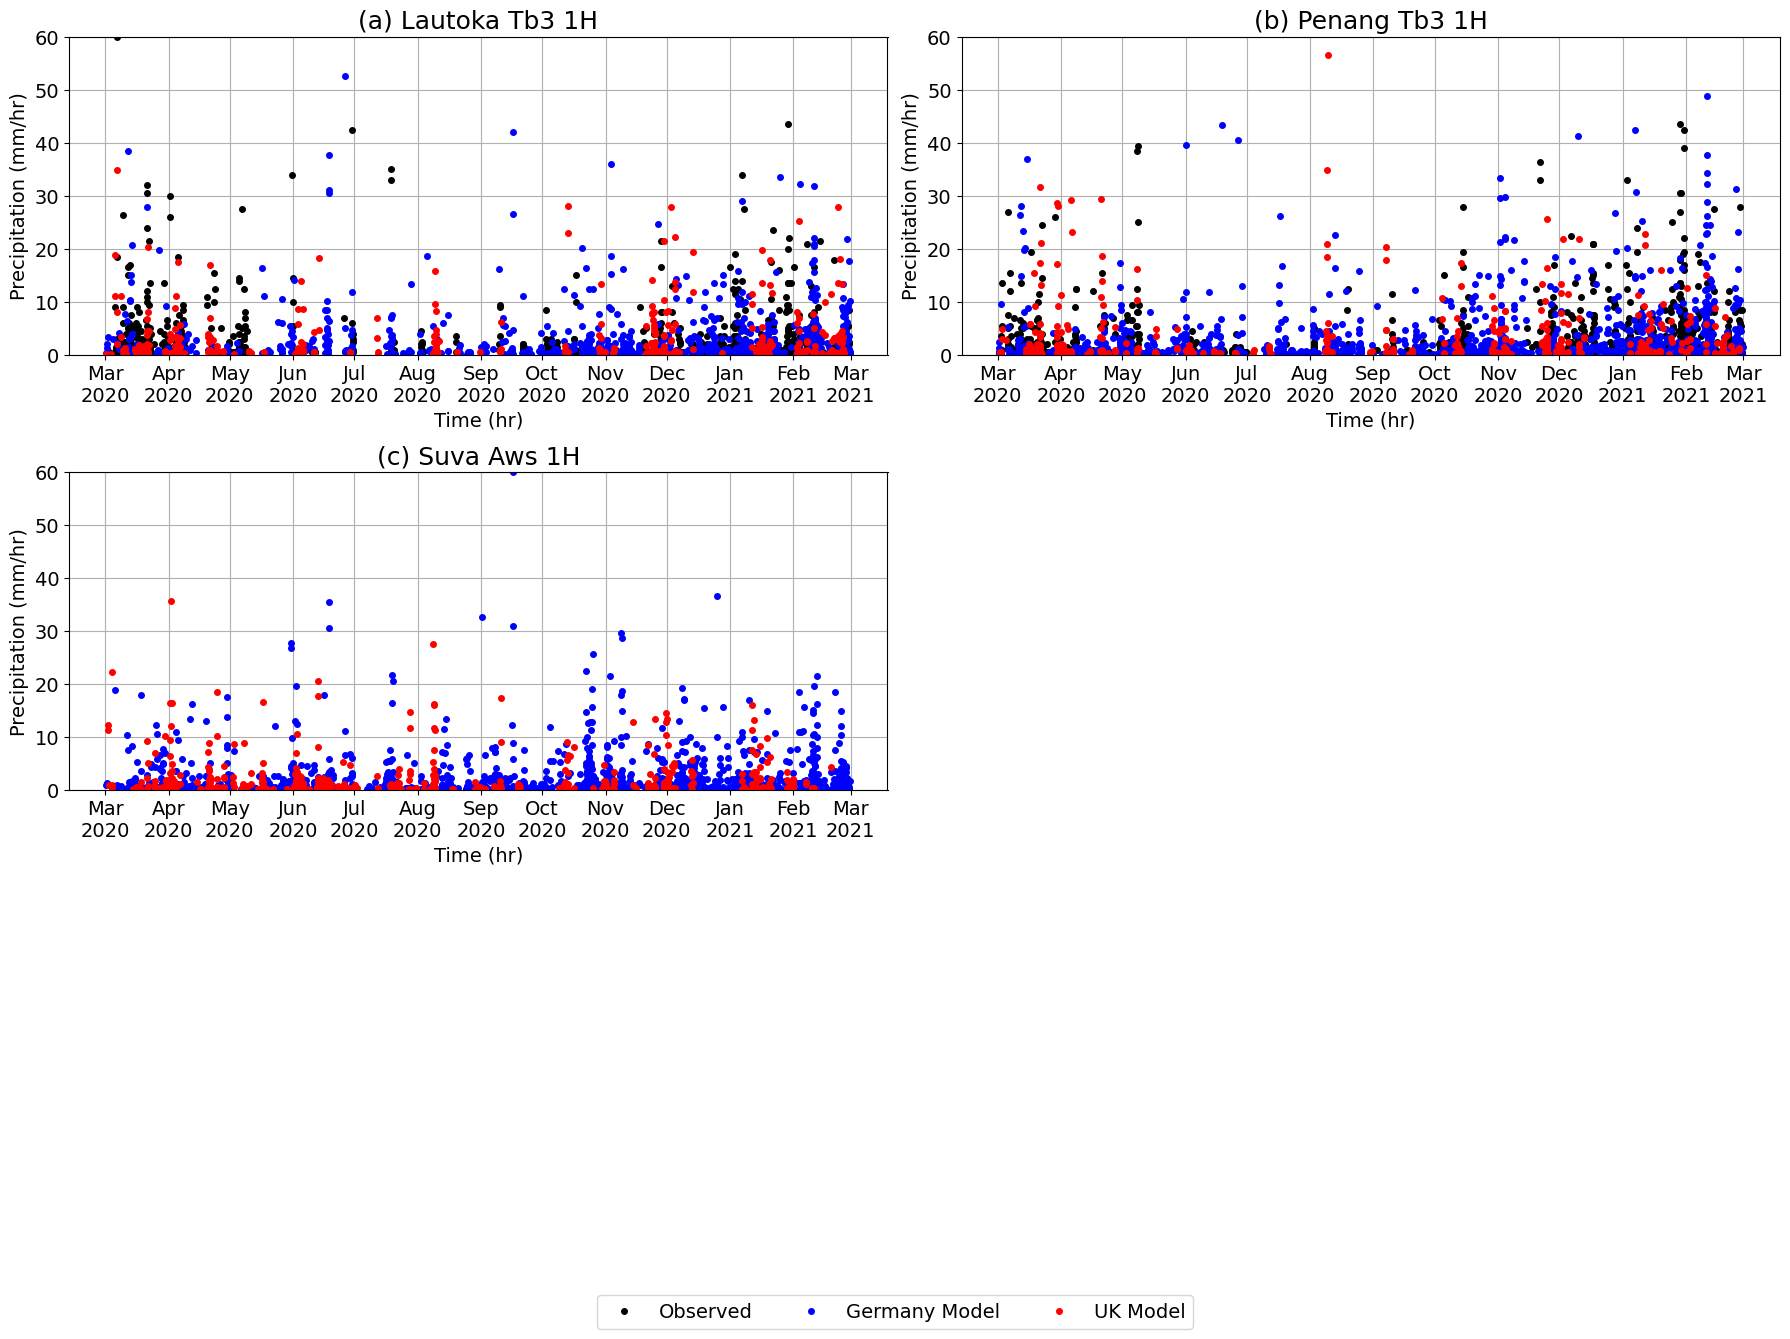

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File paths (same as before)
obs_file_paths = {
    'lautoka_tb3_1H': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji/lautoka_tb3_1H.csv',
    'penang_tb3_1H':  '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji/penang_tb3_1H.csv',
    'suva_aws_1H':    '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji/suva_aws_1H.csv',
}

germany_model_file_paths = {
    'lautoka_tb3_1H': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_fiji_z10/germany_node_Lautoka_TB3_z10.csv',
    'penang_tb3_1H':  '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_fiji_z10/germany_node_Penang_TB3_z10.csv',
    'suva_aws_1H':    '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_fiji_z10/germany_node_Suva_AWS_z10.csv',
}

uk_model_file_paths = {
    'lautoka_tb3_1H': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_fiji_z10/uk_node_Lautoka_TB3_z10.csv',
    'penang_tb3_1H':  '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_fiji_z10/uk_node_Penang_TB3_z10.csv',
    'suva_aws_1H':    '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_fiji_z10/uk_node_Suva_AWS_z10.csv',
}

obs_column = 'rain_1h_mm'
model_column = 'value'
start_date = '2020-03-01'
end_date = '2021-02-28'
stations = list(obs_file_paths.keys())

fig, axes = plt.subplots(3, 2, figsize=(18, 14), sharex=True)
axes = axes.flatten()

for i, station in enumerate(stations):
    # Load data with explicit datetime parsing for index
    obs_df = pd.read_csv(obs_file_paths[station], index_col=0)
    germany_df = pd.read_csv(germany_model_file_paths[station], index_col=0)
    uk_df = pd.read_csv(uk_model_file_paths[station], index_col=0)

    # Convert index to datetime explicitly
    obs_df.index = pd.to_datetime(obs_df.index, errors='coerce')
    germany_df.index = pd.to_datetime(germany_df.index, errors='coerce')
    uk_df.index = pd.to_datetime(uk_df.index, errors='coerce')

    # Drop any rows with NaT in index (failed datetime conversion)
    obs_df = obs_df[obs_df.index.notna()]
    germany_df = germany_df[germany_df.index.notna()]
    uk_df = uk_df[uk_df.index.notna()]

    # Sort index to avoid slicing errors
    obs_df = obs_df.sort_index()
    germany_df = germany_df.sort_index()
    uk_df = uk_df.sort_index()

    # Shift model times by 10 hours
    germany_df.index = germany_df.index + pd.Timedelta(hours=10)
    uk_df.index = uk_df.index + pd.Timedelta(hours=10)

    # Filter by date range
    obs_df = obs_df.loc[start_date:end_date]
    germany_df = germany_df.loc[start_date:end_date]
    uk_df = uk_df.loc[start_date:end_date]

    # Filter precipitation threshold > 0.2 mm/hr
    obs_df = obs_df[obs_df[obs_column] > 0.2]
    germany_df = germany_df[germany_df[model_column] > 0.2]
    uk_df = uk_df[uk_df[model_column] > 0.2]

    # Check for duplicated index - remove duplicates keeping first
    obs_df = obs_df[~obs_df.index.duplicated(keep='first')]
    germany_df = germany_df[~germany_df.index.duplicated(keep='first')]
    uk_df = uk_df[~uk_df.index.duplicated(keep='first')]

    ax = axes[i]

    # Plot with markers only
    if i == 0:
        ax.plot(obs_df.index, obs_df[obs_column], linestyle='none', marker='o', color='black', label='Observed', markersize=4)
        ax.plot(germany_df.index, germany_df[model_column], linestyle='none', marker='o', color='blue', label='Germany Model', markersize=4)
        ax.plot(uk_df.index, uk_df[model_column], linestyle='none', marker='o', color='red', label='UK Model', markersize=4)
    else:
        ax.plot(obs_df.index, obs_df[obs_column], linestyle='none', marker='o', color='black', markersize=4)
        ax.plot(germany_df.index, germany_df[model_column], linestyle='none', marker='o', color='blue', markersize=4)
        ax.plot(uk_df.index, uk_df[model_column], linestyle='none', marker='o', color='red', markersize=4)

    subplot_labels = ['(a)', '(b)', '(c)', '(d)']
    ax.set_title(f"{subplot_labels[i]} {station.replace('_', ' ').title()}", fontsize=18)
    ax.set_ylabel('Precipitation (mm/hr)', fontsize=14)
    ax.set_xlabel('Time (hr)', fontsize=14)
    ax.grid(True)
    ax.set_ylim(0,60)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    ax.tick_params(axis='both', which='major', labelsize=14)

if len(stations) < len(axes):
    for j in range(len(stations), len(axes)):
        fig.delaxes(axes[j])

for ax in axes:
    ax.tick_params(labelbottom=True)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=14)
fig.tight_layout(rect=[0, 0.07, 1, 0.96])

# plt.savefig("/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Plots/s6_timeseries_1hr_fiji.png", format='png', dpi=300, bbox_inches='tight')


plt.show()
